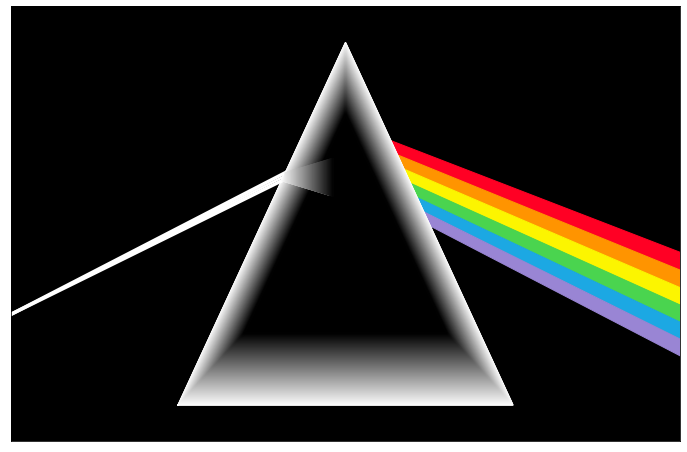

In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

'''This code reproduces one of the most 
   iconic figures in rock music
   ;)
   '''

# //-----------------------------------------------------------------------------------\\

# Third-party libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

# //-----------------------------------------------------------------------------------\\

# Some functions

def line(p1, length, angle):
    '''Calculates the coordinate `p2 (x2, y2)` 
    given `p1 (x1,y1)`, a `length` and an `angle` in degrees'''
    x1, y1 = p1
    x2 = x1 + length * np.cos(np.radians(angle))
    y2 = y1 + length * np.sin(np.radians(angle))
    p2 = [x2, y2]
    return [p1, p2]

# //-----------------------------------------------------------------------------------\\

def draw_line(l, **kwargs):
    '''Draws the line `l [(x1, y1), (x2, y2)]`'''
    _l = np.stack(l)
    plt.plot(_l[:,0], _l[:,1], **kwargs)

# //-----------------------------------------------------------------------------------\\

def line_equation(p1, p2):
    '''Returns the slope and intercept of the line `[p1, p2]`'''
    x1, y1 = p1
    x2, y2 = p2
    m = (y2 - y1) / (x2 - x1)
    b = y1 - m * x1
    return [m, b]

# //-----------------------------------------------------------------------------------\\

def lines_intersection(l1, l2):
    '''Calculates the point of intersection between lines `l1` and `l2`'''    

    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    x1, y1 = l1[0]
    x2, y2 = l1[1]
    x3, y3 = l2[0]
    x4, y4 = l2[1]
    
    xd = x1 - x2, x3 - x4
    yd = y1 - y2, y3 - y4

    d = det(*l1), det(*l2)
    div = det(xd, yd)
    
    px = det(d, xd) / div
    py = det(d, yd) / div

    return [px, py]

# //-----------------------------------------------------------------------------------\\

def draw_prism(t, s=0.01, **kwargs):
    t = t.copy()
    ax = plt.gca()
    d = np.array([[ 0.001,  0.001],
                  [-0.001,  0.001], 
                  [ 0.000, -0.001], 
                  [ 0.001,  0.001]])

    gradient = 1.0
    for i in range(int(100 / (s * 100))):
        if i > 0:
            t += d
        ax.plot(t[:,0], t[:,1], color=f'{gradient}', **kwargs)
        gradient -= s

# //-----------------------------------------------------------------------------------\\

def polygon_gradient(poly, s=0.01, 
                     orientation='horizontal', 
                     inverse=False, **kwargs):
    '''TODO 
    This is an incomplete function, I have only tested it for this figure'''

    xmin, ymin = poly.min(axis=0)
    xmax, ymax = poly.max(axis=0)
    d = (xmax - xmin) * s
    l1 = [poly[0], poly[1]]
    l2 = [poly[-1], poly[-2]]

    ax = plt.gca()
    
    gradient = 1.0
    inters = []
    inters.append([*poly[0], *poly[-1]])

    for i in range(int(100 / (s * 100))):
        
        _x = xmin + d*i
        q = [[_x, ymin],
             [_x, ymax]]

        px1, py1 = lines_intersection(l1, q)
        px2, py2 = lines_intersection(l2, q)

        if px1 < poly[0][0]:
            px1 = poly[0][0]
            
        elif px1 > poly[1][0]:
            px1 = poly[1][0]

        if py1 > poly[1][1]:
            py1 = poly[1][1]

        elif py1 < poly[0][1]:
            py1 = poly[0][1]

        _poly = np.array([[inters[i][0], inters[i][1]], 
                          [px1, py1], 
                          [px2, py2],
                          [inters[i][2], inters[i][3]]])
        
        inters.append([px1, py1, px2, py2])        
        ax.add_patch(Polygon(_poly, color=f'{gradient}', **kwargs))
        gradient -= s

# //-----------------------------------------------------------------------------------\\

if __name__ == '__main__':

    fig = plt.figure()
    fig.set_size_inches(12, 8)
    ax = fig.add_subplot(111)

    # //-----------------------------------------------------------------------------------\\

    # Prism
    t = np.array([[0.0, 0.0],
                  [1.0, 0.0],
                  [0.5, 1.0],
                  [0.0, 0.0]])
    draw_prism(t, s=0.005)

    # //-----------------------------------------------------------------------------------\\

    # Light
    x = -0.5
    y = 0.25
    length = 10

    # Angle of light
    b1 = 15
    b2 = 10
    theta1 = b1 + b2

    l = line([x, y], length, theta1)
    l1 = line([x, y], length, theta1+0.5)
    l2 = line([x, y], length, theta1-0.5)

    # Calculate the point where light intersects with the prism
    prism_side = [t[2], t[3]]

    l[-1] = lines_intersection(l, prism_side)
    l1[-1] = lines_intersection(l1, prism_side)
    l2[-1] = lines_intersection(l2, prism_side)

    draw_line(l, color='white', linewidth=2.5)
    draw_line(l1, color='white', linewidth=3.5)
    draw_line(l2, color='white', linewidth=3.5)

    # //-----------------------------------------------------------------------------------\\

    # Refraction

    # Index of refraction
    n1 = 1.0    # Air
    n2 = 1.56   # Prism

    # Angle of refraction 
    theta2 = np.arcsin(np.sin(np.radians(theta1)) / n2)

    # Angle of refraction inside the prism
    theta3 = np.radians(b1) * 2.0 - theta2

    # Angle of refraction outside the prism (rainbow)
    theta4 = np.arcsin(n2 * np.sin(theta3))
    theta4 = np.degrees(theta4)


    # //-----------------------------------------------------------------------------------\\

    # Effect of refraction inside the prism
    rp1 = line(l1[1], length=0.15, angle=np.degrees(theta2))
    rp2 = line(l2[1], length=0.15, angle=-np.degrees(theta2))

    r1 = line(l1[1], length=10, angle=np.degrees(theta2))
    r2 = line(l2[1], length=10, angle=-np.degrees(theta2))

    prism_side = [t[1], t[2]]
    r1[-1] = lines_intersection(r1, prism_side)
    r2[-1] = lines_intersection(r2, prism_side)

    poly = np.vstack([rp1, rp2,])
    polygon_gradient(poly, s=0.01, zorder=10)

    # //-----------------------------------------------------------------------------------\\

    # Output (rainbow)
    colors = [[1.0, 0, 0.14], 
              [1.0, 0.58, 0], 
              [0.99, 0.96, 0], 
              [0.29, 0.83, 0.31], 
              [0.11, 0.66, 0.89], 
              [0.60, 0.52, 0.83]]

    n = len(colors)+1

    out1 = line(r1[1], length=2.0, angle=-(theta4-3))
    out2 = line(r2[1], length=2.0, angle=-(theta4+4))

    m, b = line_equation(r1[1], r2[1])
    x = np.linspace(r1[1][0], r2[1][0], n)
    y = x * m + b

    angles = np.arange(theta4-3, theta4+4)
    lines = []

    for i in range(n):

        l = line([x[i], y[i]], length=2.0, angle=-angles[i])
        lines.append(l)

        if i > 0:
            points = np.vstack([lines[i-1], l[::-1]])
            ax.fill(points[:,0], points[:,1], c=colors[i-1])

    ax.set_facecolor('k')
    ax.set_xlim(-0.5,1.5)
    ax.set_ylim(-0.1,1.1)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()
    
    # //-----------------------------------------------------------------------------------\\

# //-----------------------------------------------------------------------------------\\
# //-----------------------------------------------------------------\\
# //---------------------------------------------------\\
# //------------------------------------\\
# //------------------------\\
# //--------------\\
# END